In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
train_deta = pd.read_csv('/Users/g/Desktop/kaggle/detaset/train.csv')
test_deta = pd.read_csv('/Users/g/Desktop/kaggle/detaset/test.csv')
train_deta
#test_deta

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [46]:
train_deta.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
train_deta['Sex'].value_counts()
test_deta['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

/var/folders/60/t_dnvk297jb87btq_f2tqsbh0000gn/T/ipykernel_1941/1544673633.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_count.index, y=gender_count.values, palette="pastel")


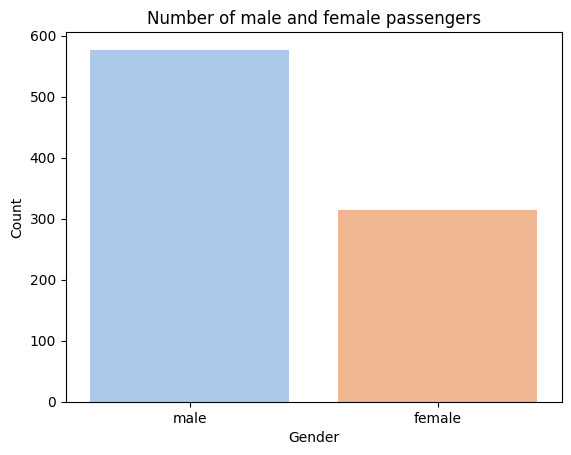

In [28]:
gender_count = train_deta['Sex'].value_counts()

sns.barplot(x=gender_count.index, y=gender_count.values, palette="pastel")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Number of male and female passengers")
plt.show()

In [34]:
train_deta["Sex"].unique()

array(['male', 'female'], dtype=object)

In [41]:
# 性別を数値に変換する

# マッピングの定義
gender_mapping = {"male":0, "female":1}

# 性別を数値に変換
train_deta["Sex"] = train_deta["Sex"].map(gender_mapping)
test_deta["Sex"] = test_deta["Sex"].map(gender_mapping)

In [42]:
train_deta

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [43]:
# 年齢を平均で補完
train_deta["Age"].fillna(train_deta["Age"].mean(), inplace=True)
test_deta["Age"].fillna(test_deta["Age"].mean(), inplace=True)

/var/folders/60/t_dnvk297jb87btq_f2tqsbh0000gn/T/ipykernel_1941/2010454694.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_deta["Age"].fillna(train_deta["Age"].mean(), inplace=True)
/var/folders/60/t_dnvk297jb87btq_f2tqsbh0000gn/T/ipykernel_1941/2010454694.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [13]:
train_deta.to_csv('/Users/g/Desktop/kaggle/v_1.0/train_data.csv')
test_deta.to_csv('/Users/g/Desktop/kaggle/v_1.0/test_data.csv')

In [14]:
import pandas as pd

train_deta = pd.read_csv('/Users/g/Desktop/kaggle/v_1.0/train_data.csv')
test_deta = pd.read_csv('/Users/g/Desktop/kaggle/v_1.0/test_data.csv')

In [15]:
train_deta

,Unnamed: 0.1,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,2,2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,4,4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,S
887,887,887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,S
888,888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,889,889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,C


In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [17]:
df = train_deta[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

X = df.drop('Survived', axis = 1) # 特徴量
y = df['Survived'] # 目的変数

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# モデルの作成
model = LogisticRegression()

# モデルの学習
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
y_pred = model.predict(X_test)

# モデルの評価
accuracy = accuracy_score(y_test, y_pred)
print("Accurac:", accuracy)

# 詳細な評価レポート
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accurac: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
 [[90 15]
 [21 53]]
